<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Raices/Newton_Raphson_Secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Raíces Númericas y ecuaciones de una variable
---

### Profesor: Juan Marcos Marín

---


# Método de Newton-Raphson

Es un método iterativo para encontrar las raíces de una función $f(x) = 0$. Es muy eficiente y tiene una convergencia rápida (cuadrática) cuando se encuentra cerca de la raíz. Este método se basa en la idea de aproximar la función mediante su tangente y encontrar dónde dicha tangente corta el eje $x$.

![Newton-Raphson](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

## Fórmula del Método de Newton-Raphson

La fórmula iterativa del método es:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

donde $x_n$ es la aproximación actual, $f'(x_n)$ es la derivada de la función en ese punto, y $x_{n+1}$ es la nueva aproximación.

### Pasos del Método de Newton-Raphson

1. **Definir la función** $f(x)$ cuya raíz queremos encontrar y su derivada $f'(x)$. Se necesita que $f'(x) \neq 0$ para que el método funcione correctamente.

2. **Escoger una estimación inicial** $x_0$ que esté cerca de la raíz.

3. **Aplicar la fórmula de actualización**:
   $$
   x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
   $$
   Este cálculo genera una nueva aproximación de la raíz.

4. **Evaluar la condición de parada**:
   - Si $|x_{n+1} - x_n| < \epsilon$, la raíz se considera encontrada con la precisión deseada.
   - Si el número máximo de iteraciones se alcanza sin cumplir la condición de precisión, el método se detiene.

5. **Repetir** los pasos 3 y 4 hasta que se cumpla la condición de parada o se alcance el número máximo de iteraciones.

Este método es más rápido que el de bisección en la mayoría de los casos, pero requiere la derivada de la función y una buena estimación inicial para garantizar la convergencia.


### Ejemplo:

Supongamos que queremos encontrar la raíz de la función $f(x) = x^2 - 4$. Sabemos que la raíz es $x = 2$. Comencemos con una aproximación inicial $x_0 = 3$.

1. Calculamos $f(x_0) = 3^2 - 4 = 5$.
2. La derivada de $f(x)$ es $f'(x) = 2x$, por lo tanto, $f'(x_0) = 2(3) = 6$.
3. Usamos la fórmula para calcular $x_1$:

   $$
   x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} = 3 - \frac{5}{6} = 3 - 0.8333 = 2.1667
   $$

4. Repetimos el proceso hasta que la aproximación sea lo suficientemente cercana a la raíz.


In [ ]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Implementación del método de Newton-Raphson.

    Parámetros:
    f        : función cuya raíz se desea encontrar.
    df       : derivada de la función.
    x0       : valor inicial de la aproximación.
    tol      : tolerancia para la convergencia.
    max_iter : número máximo de iteraciones permitidas.

    Retorna:
    tuple
        (raíz encontrada, lista con las aproximaciones sucesivas).

    Lanza:
    ValueError : Si la derivada es cero en algún punto.
    """
    aproximaciones = []  # Lista para almacenar las aproximaciones sucesivas

    for _ in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)

        # Asegurarse de que df(x0) no sea cero
        if df_x0 == 0:
            raise ValueError("La derivada es cero, el método no puede continuar.")

        # Fórmula de Newton-Raphson
        x1 = x0 - f_x0 / df_x0
        aproximaciones.append(x1)  # Guardar la aproximación en la lista

        # Verificar la condición de convergencia
        if abs(x1 - x0) < tol:
            return x1, aproximaciones  # Retorna la raíz encontrada y la lista de aproximaciones

        # Actualizar el valor para la siguiente iteración
        x0 = x1

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

## ¿Cómo calcular la derivada?

El método de Newton-Raphson tiene convergencia cuadrática, lo cual lo hace muchísimo más rápido que los métodos de bisección y punto fijo que son de convergencia lineal, pero exige conocer la derivada de $f(x)$. En algunos casos calcular la derivada es engorroso, una alternativa es usar una aproximación de la derivada, es decir remplazar $f'(x)$ por,

$$f'(x)\approx\frac{f(x+h)-f(x)}{h},$$

o aún mejor, usar diferencia centrada pues tiene menor error,

$$f'(x)\approx\frac{f(x+h)-f(x-h)}{2h},$$

## Ejemplo

Sea
$$x^2 - 4 = 0$$

In [ ]:
f = lambda x: x**2 - 4
df = lambda x: 2*x
#df = lambda x, h=1e-14: ((f(x) + h) - f(x-h)) /(2*h) # Diferencias finitas

raiz, aproximaciones = newton_raphson(f, df, 3)
print(f'La raiz será {raiz}')

La raiz será 2.0


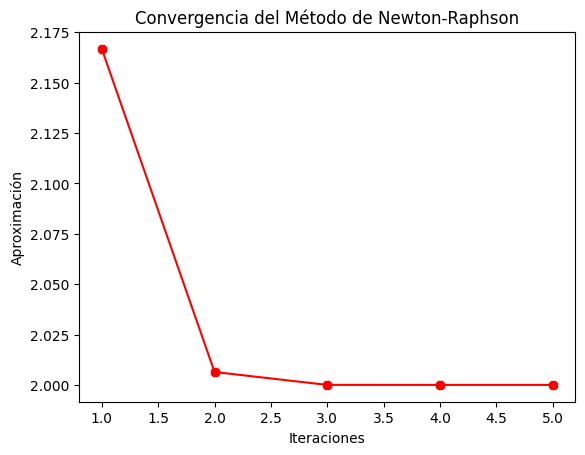

In [ ]:
iteraciones = np.arange(1, len(aproximaciones)+1)
plt.plot(iteraciones, aproximaciones, 'r8-')
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación')
plt.title('Convergencia del Método de Newton-Raphson')
plt.show()

### Convergencia del método

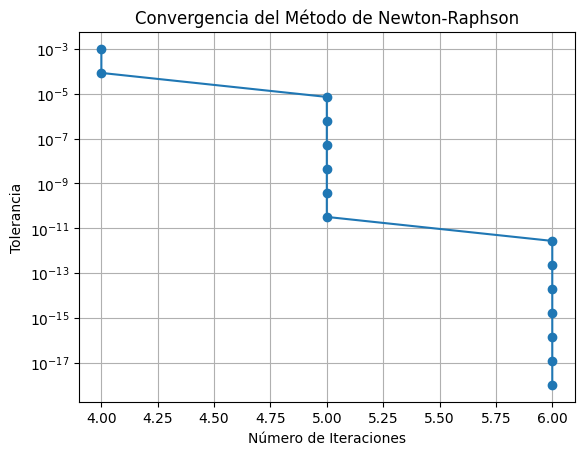

In [ ]:
tolerancias = np.logspace(-3, -18, 15)
num_iteraciones = []

for i in tolerancias:
  _, aproximaciones = newton_raphson(f, df, 3, tol=i)
  num_iteraciones.append(len(aproximaciones))  # Guardar el número de iteraciones

# Graficar el número de iteraciones vs. la tolerancia
plt.plot(num_iteraciones, tolerancias,  'o-')
plt.ylabel('Tolerancia')
plt.xlabel('Número de Iteraciones')
plt.yscale('log')  # Usar escala logarítmica en el eje y
plt.title('Convergencia del Método de Newton-Raphson')
plt.grid(True)
plt.show()

# Método de la secante

El **método de la secante** es un método numérico utilizado para aproximar las raíces de una función no lineal. Se basa en la idea de aproximar la función mediante una secante (una línea que pasa por dos puntos de la gráfica de la función) en lugar de una tangente, como en el método de Newton.

![Secante](https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Secant_method.svg/1024px-Secant_method.svg.png)

Dado una función $f(x)$, el objetivo es encontrar una raíz $\alpha$ tal que $f(\alpha) = 0$. A diferencia del método de Newton, donde se necesita el cálculo de la derivada de $f(x)$, en el método de la secante solo se utilizan dos puntos iniciales $x_0$ y $x_1$.

La fórmula iterativa del método de la secante es:

$$
x_{n+1} = x_n - \frac{f(x_n)(x_n - x_{n-1})}{f(x_n) - f(x_{n-1})}
$$

### Pasos del Método de la Secante

1. **Definir la función** $f(x)$ cuya raíz queremos encontrar. A diferencia del método de Newton-Raphson, aquí no necesitamos la derivada de $f(x)$.

2. **Escoger dos estimaciones iniciales** $x_0$ y $x_1$ que estén cerca de la raíz.

3. **Aplicar la fórmula de actualización**:
   $$
   x_{n+1} = x_n - \frac{f(x_n) \cdot (x_n - x_{n-1})}{f(x_n) - f(x_{n-1})}
   $$
   Este cálculo genera una nueva aproximación de la raíz.

4. **Evaluar la condición de parada**:
   - Si $|x_{n+1} - x_n| < \epsilon$, la raíz se considera encontrada con la precisión deseada.
   - Si el número máximo de iteraciones se alcanza sin cumplir la condición de precisión, el método se detiene.

5. **Actualizar las aproximaciones para la siguiente iteración**:
   - La aproximación más reciente, $x_{n+1}$, se convierte en la nueva aproximación actual ($x_n$).
   - La aproximación actual anterior, $x_n$, se convierte en la nueva aproximación anterior ($x_{n-1}$).

6. **Repetir** los pasos 3, 4 y 5 hasta que se cumpla la condición de parada o se alcance el número máximo de iteraciones.

Este método es una alternativa al de Newton-Raphson cuando la derivada de la función es difícil de calcular. Sin embargo, puede ser menos estable si las aproximaciones iniciales no son adecuadas.


In [ ]:
#@title Función Secante
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):
    """
    Implementación del método de la secante.

    Parámetros:
    f        : función cuya raíz se desea encontrar.
    x0       : primer valor inicial de la aproximación.
    x1       : segundo valor inicial de la aproximación.
    tol      : tolerancia para la convergencia.
    max_iter : número máximo de iteraciones permitidas.

    Retorna:
    tuple
        (raíz encontrada, lista con las aproximaciones sucesivas).

    Lanza:
    ValueError : Si la diferencia f(x1) - f(x0) es cero.
    """
    aproximaciones = [x0, x1]  # Lista para almacenar las aproximaciones sucesivas

    for _ in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)

        # Asegurarse de que f(x1) - f(x0) no sea cero
        if f_x1 - f_x0 == 0:
            raise ValueError("f(x1) - f(x0) es cero, el método no puede continuar.")

        # Fórmula de la secante
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        aproximaciones.append(x2)  # Guardar la aproximación en la lista

        # Verificar la condición de convergencia
        if abs(x2 - x1) < tol:
            return x2, aproximaciones  # Retorna la raíz encontrada y la lista de aproximaciones

        # Actualizar los valores para la siguiente iteración
        x0 = x1
        x1 = x2

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

### Ejemplo
Sea

$$x^2 - 4 = 0$$

In [ ]:
f = lambda x: x**2 - 4
raiz, aproximaciones = metodo_secante(f, 1, 3)
print(f'La raiz será {raiz}')

La raiz será 2.0000000000004996


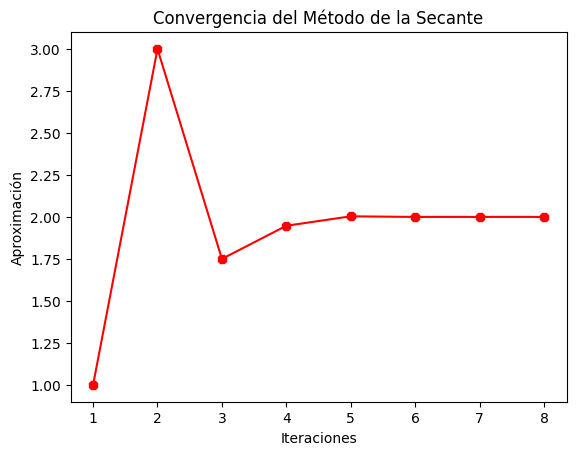

In [ ]:
iteraciones = np.arange(1, len(aproximaciones)+1)
plt.plot(iteraciones, aproximaciones, 'r8-')
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación')
plt.title('Convergencia del Método de la Secante')
plt.show()

### Ejemplo

Sea
$$x^2 - 5x + 3 = 0$$

Encontremos sus raices usando Newton-Raphson y la Secante. Luego, examinemos su convergencia.

In [ ]:
f = lambda x: x**2 - 5*x + 3
df = lambda x: 2*x -5


raiz_nr, aproximaciones_nr = newton_raphson(f, df, 1)
print(f'La raiz será {raiz_nr}')

raiz_sec, aproximaciones_sec = metodo_secante(f, 1, 3)
print(f'La raiz será {raiz_sec}')

La raiz será 0.6972243622680053
La raiz será 0.697224362268155


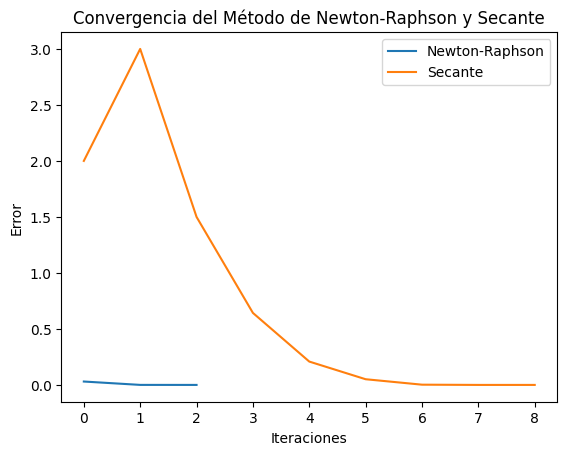

In [ ]:
error_nr = abs(np.diff(aproximaciones_nr))
error_sec = abs(np.diff(aproximaciones_sec))

plt.plot(error_nr, label='Newton-Raphson')
plt.plot(error_sec, label='Secante')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Convergencia del Método de Newton-Raphson y Secante')
plt.legend()
plt.show()